# Python Beginners Workshop: Pandas
## By Mohammad Bashiri

## Learning Goals

- What is Pandas? and Why?
- loading data and Creating Pandas Series and DataFrame objects
- Saving Pandas DataFrames
- Data Selection (indexing, masking, and splitting)
- Data Manipulation (values, index, and columns)
- Combining and splitting DataFrames
- Split-Apply-Combine

---

# Day 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Motivation

In [2]:
an_arr = np.arange(20).reshape(5, -1)
an_arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [3]:
pd.DataFrame(an_arr, 
             columns=['A', 'B', 'C', 'D'])

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


## What is Pandas? And Why?

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It stores data in a tabular form. Each table, which is sometimes called a relation, in a relational database contains one or more data categories in columns, also called attributes. Each row, also called a record or tuple, contains a unique instance of data, or key, for the categories defined by the columns.

It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### Pandas Series

Pandas Series is a generalized of one-dimensional array with flexible indexing (one index per element in the column):

In [4]:
ss = pd.Series([1, 2, 3, 4])
ss

0    1
1    2
2    3
3    4
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [5]:
ss = pd.Series([25, 30, 33, 28], 
               index=['Mohammad', 'Nick', 'Hana', 'Anna'])
ss

Mohammad    25
Nick        30
Hana        33
Anna        28
dtype: int64

In [6]:
ss = pd.Series({'Mohammad': 25, 
                'Nick':30, 
                'Hana':33, 
                'Anna': 28})
ss

Mohammad    25
Nick        30
Hana        33
Anna        28
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [7]:
ss['Mohammad']

25

In [8]:
ss[['Nick', 'Hana', 'Anna']]

Nick    30
Hana    33
Anna    28
dtype: int64

In [9]:
ss['Nick':'Anna']

Nick    30
Hana    33
Anna    28
dtype: int64

In [10]:
ss['Nick':'Anna':2]

Nick    30
Anna    28
dtype: int64

In [11]:
ss[[False, True, True, True]]

Nick    30
Hana    33
Anna    28
dtype: int64

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

### Pandas DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Pandas `DataFrame` is a generalization of two-dimensional array wit flexible indexing. We can create DataFrame directly from a dictionary, or from series:

In [12]:
age = {'Mohammad': 25, 'Nick':30, 'Hana':33, 'Anna': 28}
weight = {'Mohammad': 90, 'Nick': 80,'Hana': 50, 'Anna':55}

In [13]:
df = pd.DataFrame({'age': age, 'weight': weight})

In [14]:
df

,age,weight
Anna,28,55
Hana,33,50
Mohammad,25,90
Nick,30,80


In [15]:
df.index

Index(['Anna', 'Hana', 'Mohammad', 'Nick'], dtype='object')

In [16]:
df.columns

Index(['age', 'weight'], dtype='object')

### Other ways of creating Pandas DataFrame

Directly from a dictionary

In [17]:
df = pd.DataFrame({'age': [25, 30, 33, 28], 
                   'weight': [90, 80, 50, 55]})
df

,age,weight
0,25,90
1,30,80
2,33,50
3,28,55


In [18]:
df = pd.DataFrame({'age': [25, 30, 33, 28], 
                   'weight': [90, 80, 50, 55]}, 
                  index=['Mohammad', 'Nick', 'Hana', 'Anna'])
df

,age,weight
Mohammad,25,90
Nick,30,80
Hana,33,50
Anna,28,55


In [19]:
df = pd.DataFrame([[25, 90], 
                   [30, 80], 
                   [33, 50], 
                   [28, 55]], 
                  columns= ['Age', 'Weight'],
                  index=['Mohammad', 'Nick', 'Hana', 'Anna'])
df

,Age,Weight
Mohammad,25,90
Nick,30,80
Hana,33,50
Anna,28,55


### Import data from csv file

In [20]:
pd.read_csv("csv_sample.csv", index_col=0)

,A,B,C
D,1,4,7
E,2,5,8
F,3,6,9


### Import data from Exel sheet

**NOTE**: We need to install a library called `xlrd`.

In [21]:
pd.read_excel("excel_sample.xlsx")

,Unnamed: 0,A,B,C
0,D,1,4,7
1,E,2,5,8
2,F,3,6,9


## Writing Data to Files

In [329]:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'B': [9, 8, 7, 6, 5, 4, 3, 2, 1], 
                   'C': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']})

In [330]:
df.to_csv("hello.csv")

Note that this generates a new column for th index. If we do not want the file to automatically generate a new column:

In [331]:
df.to_csv("hello.csv", index=False)

---

## Data Inspection

In [333]:
df.head(7)

,A,B,C
0,1,9,a
1,2,8,b
2,3,7,c
3,4,6,d
4,5,5,e
5,6,4,f
6,7,3,g


In [334]:
df.tail(3)

,A,B,C
6,7,3,g
7,8,2,h
8,9,1,i


In [335]:
df.shape

(9, 3)

In [336]:
len(df)

9

In [337]:
df.dtypes

A     int64
B     int64
C    object
dtype: object

In [338]:
df.describe()

,A,B
count,9.000000,9.000000
mean,5.000000,5.000000
std,2.738613,2.738613
min,1.000000,1.000000
25%,3.000000,3.000000
50%,5.000000,5.000000
75%,7.000000,7.000000
max,9.000000,9.000000


## Column to Numpy array

A column can be selected in two ways:

In [339]:
df['A']

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64

In [340]:
df.A

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64

This retruns a Pandas Series. We can change the column (Series) to a Numpy array by using the `.values` attribute:

In [341]:
df.A.values

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

---

## Exercise 2.6

---

# Day 3

## Data Selection: Column-wise

We can select specific columns to show:

In [77]:
df[['name', 'MPI', 'age']].head()

,name,MPI,age
0,Paul Wong,Biochem,26.719182
1,Tyler Lopez,Neuro,36.479622
2,Suzanne Miller,Neuro,29.250290
3,Rebecca Russo,Neuro,29.037500
4,Timothy Chapman,Biochem,26.946125


We can also get all of the Columns:

In [78]:
df.columns

Index(['name', 'sex', 'from_Germany', 'MPI', 'age', 'papers', 'citations',
       'colleagues', 'coffees', 'ranking'],
      dtype='object')

And once we have all the columns we can use indexing to select columns:

In [79]:
df[df.columns[:5]].head()

,name,sex,from_Germany,MPI,age
0,Paul Wong,Female,True,Biochem,26.719182
1,Tyler Lopez,Male,False,Neuro,36.479622
2,Suzanne Miller,Male,False,Neuro,29.250290
3,Rebecca Russo,Female,False,Neuro,29.037500
4,Timothy Chapman,Male,True,Biochem,26.946125


## Data Selection: Row-wise

Row-wise indexing can be done in two ways:
    - via the index value
    - via the numbered location of the row, row number 10 for example
    
`.iloc`: to index rows with numbered location <br>
`.loc`: to index rows with idex value

For this purpose, let's change the index value of our DataFrame. So we are gonna import it differently:

In [105]:
df = pd.read_csv('MPI-info.csv', index_col='name')

In [106]:
df.head()

,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,ranking
name,,,,,,,,,
Paul Wong,Female,True,Biochem,26.719182,11,80,4,0,82
Tyler Lopez,Male,False,Neuro,36.479622,15,219,6,7,74
Suzanne Miller,Male,False,Neuro,29.250290,14,174,5,5,46
Rebecca Russo,Female,False,Neuro,29.037500,7,137,3,0,261
Timothy Chapman,Male,True,Biochem,26.946125,9,55,3,7,186


In [107]:
df.loc['Paul Wong': 'Suzanne Miller']

,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,ranking
name,,,,,,,,,
Paul Wong,Female,True,Biochem,26.719182,11,80,4,0,82
Tyler Lopez,Male,False,Neuro,36.479622,15,219,6,7,74
Suzanne Miller,Male,False,Neuro,29.250290,14,174,5,5,46


In [108]:
df.iloc[0:3]

,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,ranking
name,,,,,,,,,
Paul Wong,Female,True,Biochem,26.719182,11,80,4,0,82
Tyler Lopez,Male,False,Neuro,36.479622,15,219,6,7,74
Suzanne Miller,Male,False,Neuro,29.250290,14,174,5,5,46


## How to combine selection of the rows and columns?

In [109]:
df.loc['Tyler Lopez', 'MPI']

'Neuro'

In [110]:
df.iloc[1]['MPI']

'Neuro'

## More than columns and/or rows?

In [111]:
df.loc['Paul Wong': 'Suzanne Miller', 'sex': 'MPI']

,sex,from_Germany,MPI
name,,,
Paul Wong,Female,True,Biochem
Tyler Lopez,Male,False,Neuro
Suzanne Miller,Male,False,Neuro


In [112]:
df.loc[['Paul Wong', 'Suzanne Miller'], ['sex', 'MPI', 'papers']]

,sex,MPI,papers
name,,,
Paul Wong,Female,Biochem,11
Suzanne Miller,Male,Neuro,14


### Masking

In [183]:
df[df.papers > 18]

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,citations_per_paper
ranking,,,,,,,,,,
1,Melissa Lee,Male,False,Neuro,36.284564,21,325,9,11,15.476190
2,David Cabrera,Male,False,Neuro,36.454276,21,309,9,11,14.714286
5,Richard Carter,Male,False,Neuro,36.517136,20,371,9,10,18.550000
6,Yesenia Rodriguez,Male,False,Neuro,35.006498,19,291,8,5,15.315789
14,Matthew Davis,Male,False,Neuro,39.549952,19,299,8,6,15.736842
15,Joseph Campbell,Male,False,Neuro,39.618615,19,336,9,8,17.684211
17,Carolyn Martinez,Male,False,Neuro,38.788083,19,354,9,11,18.631579
22,Amber Grant,Male,False,Neuro,40.758882,19,263,8,9,13.842105


For a more concise (and readable) syntax, we can use the `query` method to perform selection on a `DataFrame`. Instead of having to type the fully-specified column, we can simply pass a string that describes what to select. The query above is then simply:

In [184]:
cond = 'papers > 18'
df.query(cond).head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,citations_per_paper
ranking,,,,,,,,,,
1,Melissa Lee,Male,False,Neuro,36.284564,21,325,9,11,15.476190
2,David Cabrera,Male,False,Neuro,36.454276,21,309,9,11,14.714286
5,Richard Carter,Male,False,Neuro,36.517136,20,371,9,10,18.550000
6,Yesenia Rodriguez,Male,False,Neuro,35.006498,19,291,8,5,15.315789
14,Matthew Davis,Male,False,Neuro,39.549952,19,299,8,6,15.736842


And we can also select the columns we want to look into right away:

In [188]:
cols = ['name', 'age', 'MPI', 'papers']

In [189]:
cond = 'papers > 18'
df.query(cond)[cols].head()

,name,age,MPI,papers
ranking,,,,
1,Melissa Lee,36.284564,Neuro,21
2,David Cabrera,36.454276,Neuro,21
5,Richard Carter,36.517136,Neuro,20
6,Yesenia Rodriguez,35.006498,Neuro,19
14,Matthew Davis,39.549952,Neuro,19


However, the more neater way in my opinion is the usage of `.loc`:

In [190]:
df.loc[df.papers > .5, cols].head()

,name,age,MPI,papers
ranking,,,,
1,Melissa Lee,36.284564,Neuro,21
2,David Cabrera,36.454276,Neuro,21
3,David Vega,29.735890,Neuro,18
4,Shannon Jacobs,30.133847,Neuro,18
5,Richard Carter,36.517136,Neuro,20


## Remember:

Its important to note that the `Series`/`DataFrame` that we get when we index our original DataFrame still includes the values of the original DataFrame, so any changes would also take effect on the original DataFrame (So you must be cautious when manipulating this data). The way to do this safely is to copy the DataFrame using the `.copy()` method.

---

## Data Manipulation

Mainly two aspect:
- Changing labels
    - change index
    - remove rows
    - add new columns
    - reordering the columns
    - renaming columns
    - removing columns
- Changing data (applying some funcions, or adding new data, etc.)
    - change column values
    - apply function on the columns and rows
        - group-wise
        - element-wise

## Labels Manipulation

### Change index

In [113]:
df.set_index('ranking', inplace=True)

In [114]:
df.head()

,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees
ranking,,,,,,,,
82,Female,True,Biochem,26.719182,11,80,4,0
74,Male,False,Neuro,36.479622,15,219,6,7
46,Male,False,Neuro,29.250290,14,174,5,5
261,Female,False,Neuro,29.037500,7,137,3,0
186,Male,True,Biochem,26.946125,9,55,3,7


And by this we can also check who is rank 1

In [115]:
df.loc[1]

sex                Male
from_Germany      False
MPI               Neuro
age             36.2846
papers               21
citations           325
colleagues            9
coffees               6
Name: 1, dtype: object

Note that we lost the old index label - the names. We can avoid that by creating a new column before removing the old label

In [116]:
df = pd.read_csv('MPI-info.csv', index_col='name')

In [118]:
df['name'] = df.index

In [120]:
df.set_index('ranking', inplace=True)

In [121]:
df.head()

,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,name
ranking,,,,,,,,,
82,Female,True,Biochem,26.719182,11,80,4,0,Paul Wong
74,Male,False,Neuro,36.479622,15,219,6,7,Tyler Lopez
46,Male,False,Neuro,29.250290,14,174,5,5,Suzanne Miller
261,Female,False,Neuro,29.037500,7,137,3,0,Rebecca Russo
186,Male,True,Biochem,26.946125,9,55,3,7,Timothy Chapman


### Reindexing

In [126]:
df.sort_index(axis=0, inplace=True)

In [127]:
df.head()

,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,name
ranking,,,,,,,,,
1,Male,False,Neuro,36.284564,21,325,9,6,Melissa Lee
2,Male,False,Neuro,36.454276,21,309,9,6,David Cabrera
3,Male,True,Neuro,29.735890,18,348,8,5,David Vega
4,Male,True,Neuro,30.133847,18,313,8,4,Shannon Jacobs
5,Male,False,Neuro,36.517136,20,371,9,5,Richard Carter


In [129]:
df.reindex([1, 2, 2000])

,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,name
ranking,,,,,,,,,
1,Male,False,Neuro,36.284564,21.0,325.0,9.0,6.0,Melissa Lee
2,Male,False,Neuro,36.454276,21.0,309.0,9.0,6.0,David Cabrera
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove rows

In [151]:
df.drop(labels=[1, 2, 5], axis=0).head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees
ranking,,,,,,,,,
3,David Vega,Male,True,Neuro,29.735890,18,348,8,5
4,Shannon Jacobs,Male,True,Neuro,30.133847,18,313,8,4
6,Yesenia Rodriguez,Male,False,Neuro,35.006498,19,291,8,0
7,Karen Barron,Male,True,Neuro,28.247096,17,325,8,1
8,Robert Davis,Male,True,Neuro,27.335361,16,214,6,0


### Add a new column

#### broadcasting a single value

In [139]:
df['new_col'] = 'anything'

#### per-row values

In [141]:
df['new_values'] = np.arange(df.shape[0])

### Reordering columns

In [147]:
new_col_order = ['name', 'sex', 'from_Germany', 'MPI', 'age', 'papers', 'citations','colleagues', 'coffees']
df = df.reindex(columns=new_col_order)  # similar to df[new_col_order]

### Renaming columns

One way is via giving the label, and choosing the axis.

In [175]:
df.rename({'sex': 'gender', 'MPI':'mpi'}, axis=1).head()

,name,gender,from_Germany,mpi,age,papers,citations,colleagues,coffees,citations_per_paper
ranking,,,,,,,,,,
1,Melissa Lee,Male,False,Neuro,36.284564,21,325,9,11,15.476190
2,David Cabrera,Male,False,Neuro,36.454276,21,309,9,11,14.714286
3,David Vega,Male,True,Neuro,29.735890,18,348,8,10,19.333333
4,Shannon Jacobs,Male,True,Neuro,30.133847,18,313,8,9,17.388889
5,Richard Carter,Male,False,Neuro,36.517136,20,371,9,10,18.550000


Another way is just to specify the columns

In [176]:
df.rename(columns={'sex': 'gender', 'MPI':'mpi'}).head()

,name,gender,from_Germany,mpi,age,papers,citations,colleagues,coffees,citations_per_paper
ranking,,,,,,,,,,
1,Melissa Lee,Male,False,Neuro,36.284564,21,325,9,11,15.476190
2,David Cabrera,Male,False,Neuro,36.454276,21,309,9,11,14.714286
3,David Vega,Male,True,Neuro,29.735890,18,348,8,10,19.333333
4,Shannon Jacobs,Male,True,Neuro,30.133847,18,313,8,9,17.388889
5,Richard Carter,Male,False,Neuro,36.517136,20,371,9,10,18.550000


### Removing columns

In [154]:
df.drop(labels='coffees', axis=1).head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues
ranking,,,,,,,,
1,Melissa Lee,Male,False,Neuro,36.284564,21,325,9
2,David Cabrera,Male,False,Neuro,36.454276,21,309,9
3,David Vega,Male,True,Neuro,29.735890,18,348,8
4,Shannon Jacobs,Male,True,Neuro,30.133847,18,313,8
5,Richard Carter,Male,False,Neuro,36.517136,20,371,9


## Data manipulation

In [155]:
df.head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees
ranking,,,,,,,,,
1,Melissa Lee,Male,False,Neuro,36.284564,21,325,9,6
2,David Cabrera,Male,False,Neuro,36.454276,21,309,9,6
3,David Vega,Male,True,Neuro,29.735890,18,348,8,5
4,Shannon Jacobs,Male,True,Neuro,30.133847,18,313,8,4
5,Richard Carter,Male,False,Neuro,36.517136,20,371,9,5


### Changing column values

In [156]:
df['coffees'] += 5

In [157]:
df.head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees
ranking,,,,,,,,,
1,Melissa Lee,Male,False,Neuro,36.284564,21,325,9,11
2,David Cabrera,Male,False,Neuro,36.454276,21,309,9,11
3,David Vega,Male,True,Neuro,29.735890,18,348,8,10
4,Shannon Jacobs,Male,True,Neuro,30.133847,18,313,8,9
5,Richard Carter,Male,False,Neuro,36.517136,20,371,9,10


In [158]:
df['citations_per_paper'] = df['citations'] / df['papers']

In [159]:
df.head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,citations_per_paper
ranking,,,,,,,,,,
1,Melissa Lee,Male,False,Neuro,36.284564,21,325,9,11,15.476190
2,David Cabrera,Male,False,Neuro,36.454276,21,309,9,11,14.714286
3,David Vega,Male,True,Neuro,29.735890,18,348,8,10,19.333333
4,Shannon Jacobs,Male,True,Neuro,30.133847,18,313,8,9,17.388889
5,Richard Carter,Male,False,Neuro,36.517136,20,371,9,10,18.550000


### Applying functions: group-wise

### This is also called aggregation: **taking many samples and produce one value**

In [161]:
np.mean(df['age']), np.std(df['age'])

(31.362755062994122, 4.7470265301199825)

This approach becomes redundant as soon as want to do calculate the same thing for many other columns. Pandas provides fucntions that take other functions as input and perform the operations on as many columns as you'd like:

In [165]:
df.agg([np.mean, np.std, np.min, np.max])

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,citations_per_paper
amin,Aaron Brooks,Female,False,Biochem,23.176235,2.000000,-8.000000,0.000000,5.000000,-1.142857
amax,Yesenia Rodriguez,Male,True,Neuro,44.467649,21.000000,371.000000,9.000000,12.000000,25.333333
mean,NaN,NaN,0.5,NaN,31.362755,10.983333,130.416667,4.050000,6.753333,11.323555
std,NaN,NaN,0.500835,NaN,4.754958,3.216240,79.433675,1.688293,2.416323,5.052053


In [178]:
cols = ['age', 'papers']
df[cols].agg([np.mean, np.std, np.min, np.max])

,age,papers
mean,31.362755,10.983333
std,4.754958,3.216240
amin,23.176235,2.000000
amax,44.467649,21.000000


There many other function one can use to produce more information about the data in hand:

<center>
    <img src="pandas_function.png" width="70%"/>
</center>

### Applying functions: element-wise

In [201]:
df['coffees'] -= df['coffees'].min()

However, again, we are working with one column at the time. How can we change the elements of multiple functions 

In [219]:
cols = ['coffees']
df[cols] = df[cols].apply(lambda x: x / x.max())

Normalize all the columns (between 0 and 1)

In [210]:
cols = ['age', 'papers', 'citations', 'colleagues']
df_noremd = df[cols].apply(lambda x: x / x.max()).copy()

In [207]:
df_noremd.agg([np.max, np.min])

,age,papers,citations,colleagues,coffees
amax,1.0,1.0,1.0,1.0,1.0
amin,0.0,0.0,0.0,0.0,0.0


## Borh `agg()` and `apply()` can be done both column-wise and row-wise

In [275]:
cols = ['age', 'papers', 'citations', 'colleagues']

In [277]:
df[cols].agg(np.min, axis=1).head()

ranking
1    9.000000
2    9.000000
3    6.559656
4    6.957612
5    9.000000
dtype: float64

In [278]:
df[cols].apply(lambda x: x - x.min(), axis=1).head()

,age,papers,citations,colleagues
ranking,,,,
1,4.108329,10.000000,324.000000,0.000000
2,4.278041,10.000000,308.000000,0.000000
3,0.000000,9.440344,349.440344,1.440344
4,0.000000,9.042388,314.042388,1.042388
5,4.340902,9.000000,370.000000,0.000000


## Merging and Splitting

### Two DataFrame, same size, common column(s)

In [249]:
left = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [10, 20, 30, 40, 50], 
                     'C': [100, 200, 300, 400, 500]})

right = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                      'B': [10, 20, 30, 40, 50], 
                      'D': [1000, 2000, 3000, 4000, 5000]})

pd.merge(left, right)

,A,B,C,D
0,1,10,100,1000
1,2,20,200,2000
2,3,30,300,3000
3,4,40,400,4000
4,5,50,500,5000


### Two DataFrame, different size, common column(s)

In [267]:
left = pd.DataFrame({'session': [1, 2, 3],
                     'mean_RT': [.3, .27, .25], 
                     'mean_perc_correct': [.6, .8, 1]})

right = pd.DataFrame({'session': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                      'trial': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
                      'RT': [.29, .28, .3, .32, .31, .28, .27, .29, .26, .25, .25, .24, .27, .26, .24], 
                      'correct': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

In [268]:
left

,session,mean_RT,mean_perc_correct
0,1,0.30,0.6
1,2,0.27,0.8
2,3,0.25,1.0


In [269]:
right

,session,trial,RT,correct
0,1,1,0.29,0
1,1,2,0.28,0
2,1,3,0.30,1
3,1,4,0.32,1
4,1,5,0.31,1
5,2,1,0.28,0
6,2,2,0.27,1
7,2,3,0.29,1
8,2,4,0.26,1
9,2,5,0.25,1


In [271]:
pd.merge(left, right)

,session,mean_RT,mean_perc_correct,trial,RT,correct
0,1,0.30,0.6,1,0.29,0
1,1,0.30,0.6,2,0.28,0
2,1,0.30,0.6,3,0.30,1
3,1,0.30,0.6,4,0.32,1
4,1,0.30,0.6,5,0.31,1
5,2,0.27,0.8,1,0.28,0
6,2,0.27,0.8,2,0.27,1
7,2,0.27,0.8,3,0.29,1
8,2,0.27,0.8,4,0.26,1
9,2,0.27,0.8,5,0.25,1


## More on Merging

In [250]:
left = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [10, 20, 30, 40, 50], 
                     'C': [100, 200, 300, 400, 500]})

right = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                      'B': [-10, 20, -30, 40, -50], 
                      'D': [1000, 2000, 3000, 4000, 5000]})
pd.merge(left, right)

,A,B,C,D
0,2,20,200,2000
1,4,40,400,4000


What is happening here: Pandas looks for mutual labels (both index and rows). and by default takes the intersection of common labels

How can we take the union?

In [253]:
pd.merge(left, right, how='outer')

,A,B,C,D
0,1,10,100.0,NaN
1,2,20,200.0,2000.0
2,3,30,300.0,NaN
3,4,40,400.0,4000.0
4,5,50,500.0,NaN
5,1,-10,NaN,1000.0
6,3,-30,NaN,3000.0
7,5,-50,NaN,5000.0


How can we tell Pandas to only look into one column and take the intersection (or union)?

In [255]:
pd.merge(left, right, on='A')

,A,B_x,C,B_y,D
0,1,10,100,-10,1000
1,2,20,200,20,2000
2,3,30,300,-30,3000
3,4,40,400,40,4000
4,5,50,500,-50,5000


### **Note**: since A is completely similar between the two dataframes, the outer and inner would not differ

In [258]:
pd.merge(left, right, how='outer', on='A')

,A,B_x,C,B_y,D
0,1,10,100,-10,1000
1,2,20,200,20,2000
2,3,30,300,-30,3000
3,4,40,400,40,4000
4,5,50,500,-50,5000


But if we join the two dataframes based on `B`, things are different, becasue the intersection and union of the `B` columns in the two DataFrames are diffrent.

In [259]:
pd.merge(left, right, on='B')

,A_x,B,C,A_y,D
0,2,20,200,2,2000
1,4,40,400,4,4000


In [257]:
pd.merge(left, right, how='outer', on='B')

,A_x,B,C,A_y,D
0,1.0,10,100.0,NaN,NaN
1,2.0,20,200.0,2.0,2000.0
2,3.0,30,300.0,NaN,NaN
3,4.0,40,400.0,4.0,4000.0
4,5.0,50,500.0,NaN,NaN
5,NaN,-10,NaN,1.0,1000.0
6,NaN,-30,NaN,3.0,3000.0
7,NaN,-50,NaN,5.0,5000.0


## Splitting Pandas DataFrames

Let's start by splitting. Usually, we want to split our DataFrame into multiple DataFrames based on the values of a specific column. In other words we want to group the data in our dataset, based on some value. The function we use to do this is called `groupby()`.

In [285]:
grp = df.groupby('MPI')

In [286]:
grp.groups

{'Biochem': Int64Index([ 23,  30,  39,  50,  54,  58,  68,  69,  71,  77,
             ...
             289, 290, 291, 292, 293, 294, 295, 296, 297, 299],
            dtype='int64', name='ranking', length=153),
 'Neuro': Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             252, 259, 261, 268, 270, 272, 273, 281, 298, 300],
            dtype='int64', name='ranking', length=147)}

In [289]:
grp.get_group('Biochem').head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,citations_per_paper
ranking,,,,,,,,,,
23,Heather Baker,Female,True,Biochem,6.797654,13.0,129.0,5.0,0.0,8.066667
30,Lori Ruiz,Female,True,Biochem,4.863175,12.0,112.0,5.0,0.0,7.428571
39,Dr. Jason Perez,Female,True,Biochem,3.204867,11.0,112.0,4.0,0.0,8.000000
50,Jamie Bowen,Female,True,Biochem,5.402584,11.0,146.0,5.0,0.0,10.615385
54,Jennifer Smith,Female,True,Biochem,3.237252,10.0,103.0,4.0,0.0,7.916667


In [290]:
df.shape, grp.get_group('Biochem').shape, grp.get_group('Neuro').shape

((300, 10), (153, 10), (147, 10))

And since now we have two separate dataframes, we can perform all the above mentioned oeprations on them..

---

## Exercise #2

---

### Split-Apply-Combine

The idea behind this term is simply the fact that, we usually want to *split* the DataFrame, *apply* some function on it, and the *combine* the results.<br>

### Example: we want to split our DataFrame based on whether the people are from Neuro or Biochem MPI. And then we want to finc the mean number of published paper, or anything.. and we want to have that value back in our original dataframe which includes people from both MPI.

So we need to:
- split first
- apply a function on each dataframe
- combine them again

If we want to compute a single value (i.e., aggregation), the we use `agg()`:

In [294]:
df.groupby('MPI').agg(np.mean)

,from_Germany,age,papers,citations,colleagues,coffees,citations_per_paper
MPI,,,,,,,
Biochem,0.503268,8.034829,7.594771,83.444444,3.091503,0.251167,7.879584
Neuro,0.496599,8.344403,10.428571,195.632653,5.047619,0.249757,14.908096


If we want an element-wise operation, then we use `apply()`:

In [299]:
cols = ['papers', 'coffees']
df.groupby('MPI')[cols].apply(lambda x: x - x.min()).head()

,papers,coffees
ranking,,
1,16.0,0.857143
2,16.0,0.857143
3,13.0,0.714286
4,13.0,0.571429
5,15.0,0.714286


---

## Plotting with Pandas

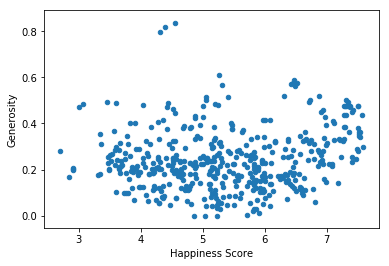

In [234]:
df.plot.scatter(x='Happiness Score', y='Generosity');

---

## Exercise #3

---

## More Pandas

### Apply() vs. agg() vs. transform()

In [260]:
df = pd.DataFrame(data=np.random.rand(8, 2), columns=['C', 'D'])

In [261]:
df['A'] = ['foo', 'bar'] * 3 + ['foo', 'foo']

In [262]:
df

,C,D,A
0,0.246585,0.555072,foo
1,0.546432,0.787800,bar
2,0.887900,0.949350,foo
3,0.571210,0.262975,bar
4,0.535737,0.757636,foo
5,0.049385,0.516618,bar
6,0.142909,0.092581,foo
7,0.276184,0.888770,foo


Element-wise operation

In [263]:
zscore = lambda x: (x - x.mean()) / x.std()

In [265]:
df.groupby('A').apply(zscore)

,C,D
0,-0.571054,-0.270814
1,0.534754,1.010951
2,1.567143,0.869836
3,0.618924,-0.988677
4,0.393002,0.315205
5,-1.153678,-0.022274
6,-0.916721,-1.608804
7,-0.472370,0.694578


In [264]:
df.groupby('A').transform(zscore)

,C,D
0,-0.571054,-0.270814
1,0.534754,1.010951
2,1.567143,0.869836
3,0.618924,-0.988677
4,0.393002,0.315205
5,-1.153678,-0.022274
6,-0.916721,-1.608804
7,-0.472370,0.694578


In [268]:
df.groupby('A').agg(zscore)  # would give an error, because it should be given a group and result in a single value

In this case `apply()` and `transform()` work exactly the same way. <br>
**Note** that `agg()` would not work in this case, because we are working on elemetns rather than the whole data.

Group-wise operation

In [269]:
df.groupby('A').transform(sum)

,C,D
0,2.089315,3.243409
1,1.167027,1.567393
2,2.089315,3.243409
3,1.167027,1.567393
4,2.089315,3.243409
5,1.167027,1.567393
6,2.089315,3.243409
7,2.089315,3.243409


In [270]:
df.groupby('A').apply(sum)

,C,D,A
A,,,
bar,1.167027,1.567393,barbarbar
foo,2.089315,3.243409,foofoofoofoofoo


In [271]:
df.groupby('A').agg(sum)

,C,D
A,,
bar,1.167027,1.567393
foo,2.089315,3.243409


In this case `apply()` and `agg()` work (almost) the same way, except that `agg()` only works on numerical data. <br>
Here the advantage of `transform()` is that it automatically broadcasts the results to the actual size of the dataframe (making it easier to creating new columns as a result of group-wise operations). however, this is not possible with `apply()` or `agg()` in this case.

One other thing to note is that transform only sees a single column (i.e., series) at a time:

In [274]:
df.groupby('A').transform(lambda x: x - x.min())

,C,D
0,0.103677,0.462490
1,0.497047,0.524824
2,0.744992,0.856769
3,0.521825,0.000000
4,0.392829,0.665054
5,0.000000,0.253643
6,0.000000,0.000000
7,0.133275,0.796189


In [277]:
df.groupby('A').transform(lambda x: x['C'] - x['D'])

But this is not the case for `apply()`

In [276]:
df.groupby('A').apply(lambda x: x['C'] - x['D'])

A     
bar  1   -0.241368
     3    0.308235
     5   -0.467233
foo  0   -0.308487
     2   -0.061450
     4   -0.221898
     6    0.050327
     7   -0.612586
dtype: float64

### Binning a single column

In [310]:
df['papers_rng'] = pd.cut(df.papers, bins=5, labels=False)

In [312]:
df.head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,citations_per_paper,papers_rng
ranking,,,,,,,,,,,
1,Melissa Lee,Male,False,Neuro,13.108329,19.0,333.0,9.0,0.857143,15.476190,4
2,David Cabrera,Male,False,Neuro,13.278041,19.0,317.0,9.0,0.857143,14.714286,4
3,David Vega,Male,True,Neuro,6.559656,16.0,356.0,8.0,0.714286,19.333333,4
4,Shannon Jacobs,Male,True,Neuro,6.957612,16.0,321.0,8.0,0.571429,17.388889,4
5,Richard Carter,Male,False,Neuro,13.340902,18.0,379.0,9.0,0.714286,18.550000,4


---

## References

- Visualization: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html